<a href="https://colab.research.google.com/github/l642/ResNet50/blob/main/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the Libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# resize all the images 
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/car_data/Train'
valid_path = '/content/drive/MyDrive/car_data/Test'

In [3]:
#import the ResNet model with imageNet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 


94773248/94765736 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/car_data/Train/*')

In [8]:
#  Adding flaten layer
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# cost and optimization 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/car_data/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/car_data/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 41s 32s/step - loss: 5.0325 - accuracy: 0.4167 - val_loss: 7.5767 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 906ms/step - loss: 5.2506 - accuracy: 0.4062 - val_loss: 5.3184 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 1s 808ms/step - loss: 6.2122 - accuracy: 0.3021 - val_loss: 3.8634 - val_accuracy: 0.2241
Epoch 4/50
2/2 [==============================] - 1s 824ms/step - loss: 2.9356 - accuracy: 0.4479 - val_loss: 2.3975 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 805ms/step - loss: 2.6893 - accuracy: 0.3646 - val_loss: 2.1397 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 830ms/step - loss: 1.4674 - accuracy: 0.5000 - val_loss: 1.8925 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 783ms/step - loss: 1.8472 - accuracy: 0.6146 - val_loss: 2.0529 - val_accuracy: 0.5345
Epoch 8/50
2/2 [=====

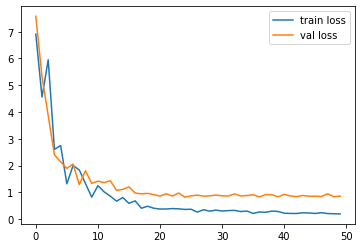

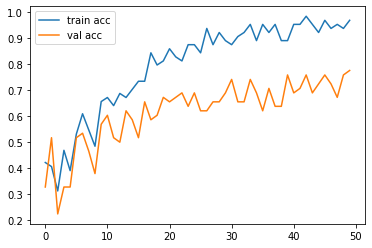

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
#saving the model
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
#testing on random image
img=image.load_img('/content/drive/MyDrive/car_data/Train/audi/1.jpg',target_size=(224,224))


In [19]:
#converting the image to gray
x=image.img_to_array(img)
x

array([[[233., 219., 208.],
        [234., 220., 209.],
        [237., 223., 212.],
        ...,
        [213., 216., 221.],
        [218., 221., 226.],
        [161., 164., 169.]],

       [[240., 226., 215.],
        [240., 226., 215.],
        [243., 229., 218.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       [[247., 233., 222.],
        [247., 233., 222.],
        [250., 236., 225.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       ...,

       [[130., 112., 108.],
        [135., 117., 113.],
        [138., 124., 123.],
        ...,
        [213., 212., 208.],
        [215., 210., 207.],
        [215., 210., 207.]],

       [[126., 108., 104.],
        [133., 115., 111.],
        [130., 116., 115.],
        ...,
        [217., 216., 212.],
        [218., 213., 210.],
        [218., 213., 210.]],

       [[121., 103.,  99.],
        [133., 115., 111.],
        [135., 1

In [20]:
x=x/255

In [21]:
#reshaping the image for testing
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [22]:
#prediction
model.predict(img_data)

array([[0.07400389, 0.00285445, 0.9231417 ]], dtype=float32)

In [23]:
a=np.argmax(model.predict(img_data), axis=1)

In [26]:
a==2

array([ True])

In [28]:
#testing on test data
y_pred = model.predict(test_set)
y_pred

array([[7.93747902e-02, 5.45975149e-01, 3.74650091e-01],
       [4.04052734e-02, 6.59484804e-01, 3.00109863e-01],
       [3.18282366e-01, 2.99569339e-01, 3.82148325e-01],
       [7.96227828e-02, 4.11744595e-01, 5.08632660e-01],
       [1.19260571e-03, 9.74900126e-01, 2.39072386e-02],
       [1.01887360e-02, 9.72149372e-01, 1.76618602e-02],
       [4.11797166e-02, 2.42783889e-01, 7.16036379e-01],
       [1.20098643e-01, 2.12430110e-04, 8.79688919e-01],
       [7.69880041e-02, 7.12966081e-03, 9.15882289e-01],
       [8.55289772e-02, 5.30468762e-01, 3.84002298e-01],
       [2.17497796e-01, 1.71415452e-02, 7.65360713e-01],
       [7.80038893e-01, 1.85371116e-01, 3.45899276e-02],
       [7.60796726e-01, 6.74638674e-02, 1.71739444e-01],
       [9.65560377e-01, 2.00871285e-02, 1.43525535e-02],
       [3.93506996e-02, 6.76807046e-01, 2.83842266e-01],
       [5.19193651e-04, 9.92610514e-01, 6.87024323e-03],
       [7.82594144e-01, 1.14011057e-01, 1.03394814e-01],
       [6.74181879e-02, 7.49164

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
#prediction for test data
y_pred

array([1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1])